In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from datetime import datetime
from scipy import stats
import os

import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product

In [2]:
df = pd.read_csv('/anvil/projects/tdm/corporate/inogen-oxy/data/NUMERIC_ID_USABLE_G5_EUField.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/anvil/projects/tdm/corporate/inogen-oxy/data/NUMERIC_ID_USABLE_G5_EUField.csv'

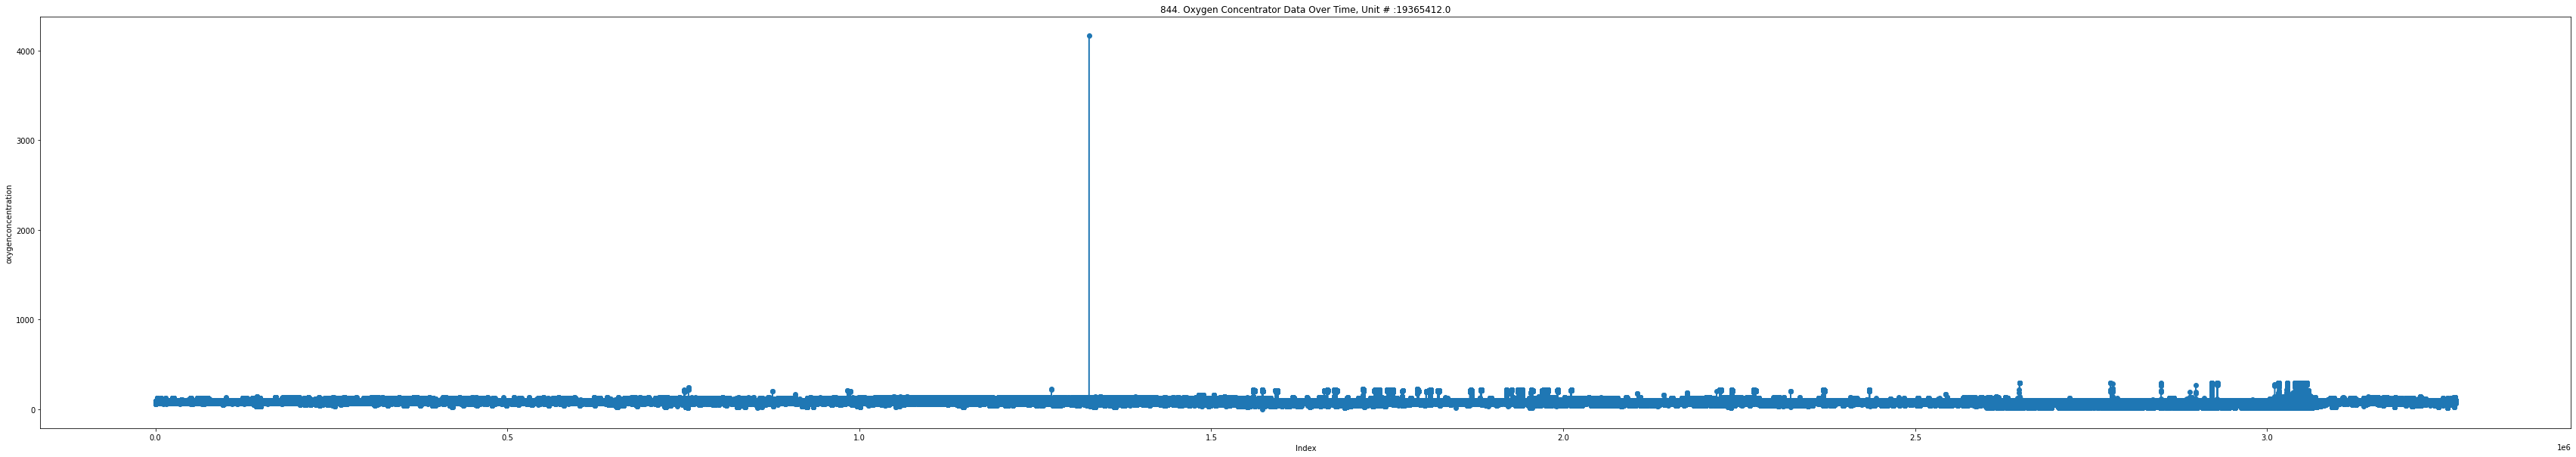

In [44]:
grouped = df.groupby('unit')

# Create a list to store the individual DataFrames
individual_datasets = []

# Iterate through the groups and create separate DataFrames
for group_name, group_data in grouped:
    individual_datasets.append(group_data)

data = individual_datasets[28]

data['rtc'] = pd.to_datetime(data['rtc'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
data['rtc'] = data['rtc'].fillna(data['rtc'].apply(lambda x: x.replace(hour=0, minute=0, second=0)))

data.sort_values(by='rtc', inplace=True)
data.reset_index(drop=True, inplace=True)


# Create the plot
plt.figure(figsize=(60, 10))  # Adjust the figure size as needed
plt.plot(data.index, data['oxygenconcentration'], marker='o')
plt.xlabel('Index')
plt.ylabel('oxygenconcentration')
plt.title(str(i) + '. Oxygen Concentrator Data Over Time, Unit # :' + str(data['unit'].values[0]))

plt.show()


In [45]:
data['error_val'] = 0  # Initialize 'error_val' column with 0

# Apply conditions to update 'error_val' based on non-zero columns
data.loc[(data['errorshigh'] != 0), 'error_val'] = 100
data.loc[(data['errorsmed'] != 0) & (data['error_val'] == 0), 'error_val'] = 70
data.loc[(data['errorslow'] != 0) & (data['error_val'] == 0), 'error_val'] = 40


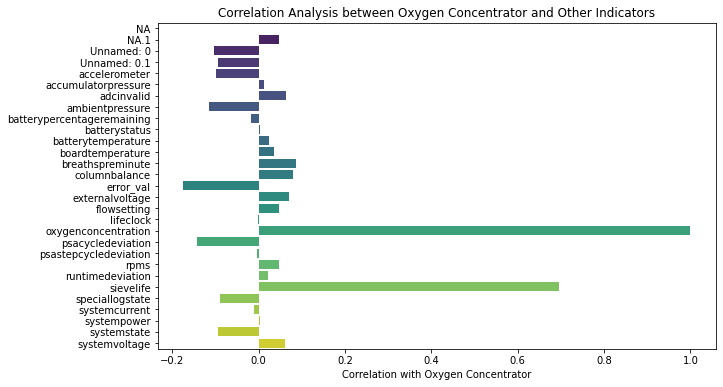

In [46]:

# Columns to exclude from correlation analysis
exclude_columns = ['id', 'rtc', 'chargestatus', 'chargerstate', 'inserttime', 'unit', 'errorshigh', 'errorsmed', 'errorslow']
# exclude_columns = []

# Selecting columns for correlation analysis
selected_columns = data.columns.difference(exclude_columns)

# Calculating correlations
correlations = data[selected_columns].corrwith(data['oxygenconcentration'])

# Save the correlations to a CSV file
correlation_df = pd.DataFrame(correlations, columns=['Correlation with OxygenConcentrator'])
correlation_df.to_csv('correlation_analysis[28].csv')

# Creating a bar plot for correlation analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.xlabel('Correlation with Oxygen Concentrator')
plt.title('Correlation Analysis between Oxygen Concentrator and Other Indicators')
plt.show()

In [55]:

# Create a directory for the correlation analysis files
directory = 'correlation_analysis'
if not os.path.exists(directory):
    os.makedirs(directory)

grouped = df.groupby('unit')

for i, (group_name, group_data) in enumerate(grouped):
    data = group_data.copy()

    # Count the number of entries for each unit
    num_entries = len(data)

    # Preprocessing steps for datetime and sorting
    data['rtc'] = pd.to_datetime(data['rtc'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
    data['rtc'] = data['rtc'].fillna(data['rtc'].apply(lambda x: x.replace(hour=0, minute=0, second=0)))
    data.sort_values(by='rtc', inplace=True)
    data.reset_index(drop=True, inplace=True)

    # Adding error_val column based on conditions
    data['error_val'] = 0
    data.loc[(data['errorshigh'] != 0), 'error_val'] = 100
    data.loc[(data['errorsmed'] != 0) & (data['error_val'] == 0), 'error_val'] = 70
    data.loc[(data['errorslow'] != 0) & (data['error_val'] == 0), 'error_val'] = 40

    # Columns to exclude from correlation analysis
    exclude_columns = ['id', 'rtc', 'chargestatus', 'chargerstate', 'inserttime', 'unit', 'errorshigh', 'errorsmed', 'errorslow']

    # Selecting columns for correlation analysis
    selected_columns = data.columns.difference(exclude_columns)

    # Calculating correlations
    correlations = data[selected_columns].corrwith(data['oxygenconcentration'])

    # Save the correlations to a CSV file in the specified directory
    file_name = f"{directory}/correlation_analysis_unit_{group_name}_index_{i}.csv"
    correlation_df = pd.DataFrame(correlations, columns=['Entries: ' + str(len(data))])
    correlation_df.to_csv(file_name)

    print(f"Unit: {group_name}, Entries: {num_entries} - Correlation analysis saved to {file_name}")

Unit: 0.0, Entries: 2391 - Correlation analysis saved to correlation_analysis/correlation_analysis_unit_0.0_index_0.csv
Unit: 11111111.0, Entries: 1546 - Correlation analysis saved to correlation_analysis/correlation_analysis_unit_11111111.0_index_1.csv
Unit: 12345678.0, Entries: 1088 - Correlation analysis saved to correlation_analysis/correlation_analysis_unit_12345678.0_index_2.csv
Unit: 19171019.0, Entries: 1324 - Correlation analysis saved to correlation_analysis/correlation_analysis_unit_19171019.0_index_3.csv
Unit: 19261021.0, Entries: 856 - Correlation analysis saved to correlation_analysis/correlation_analysis_unit_19261021.0_index_4.csv
Unit: 19275002.0, Entries: 477 - Correlation analysis saved to correlation_analysis/correlation_analysis_unit_19275002.0_index_5.csv
Unit: 19294367.0, Entries: 2924 - Correlation analysis saved to correlation_analysis/correlation_analysis_unit_19294367.0_index_6.csv
Unit: 19304188.0, Entries: 80 - Correlation analysis saved to correlation_anal